In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras import layers
import matplotlib.pyplot as plt

## Data

In [163]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

batch_size = 64
target_size = (150, 150)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '.\\dataset\\bmsb_dataset',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
)

validation_generator = train_datagen.flow_from_directory(
    '.\\dataset\\bmsb_dataset',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
)

Found 904 images belonging to 2 classes.
Found 225 images belonging to 2 classes.


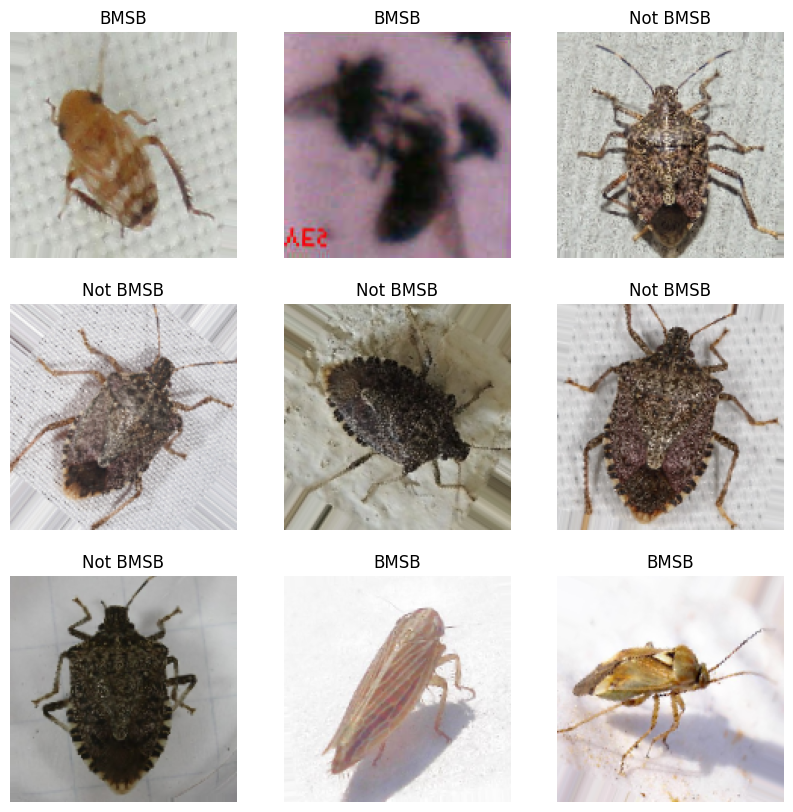

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):  # Plotting 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Images are already decoded as uint8 and normalized
        plt.title('BMSB' if labels[i] else 'Not BMSB')  # Assuming binary labels [1., 0.]
        plt.axis("off")
    break  # Important to break after the first batch to avoid infinite loop
plt.show()

## Models

### Simple CNN

In [161]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 36, 36, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 20736)             0         
                                                                 
 dropout_21 (Dropout)        (None, 20736)           

In [6]:
# Step 2: Model Building
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Model Training
epochs = 100
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dropout (Dropout)           (None, 20736)            

In [ ]:
model.save('models/2-layer.h5')

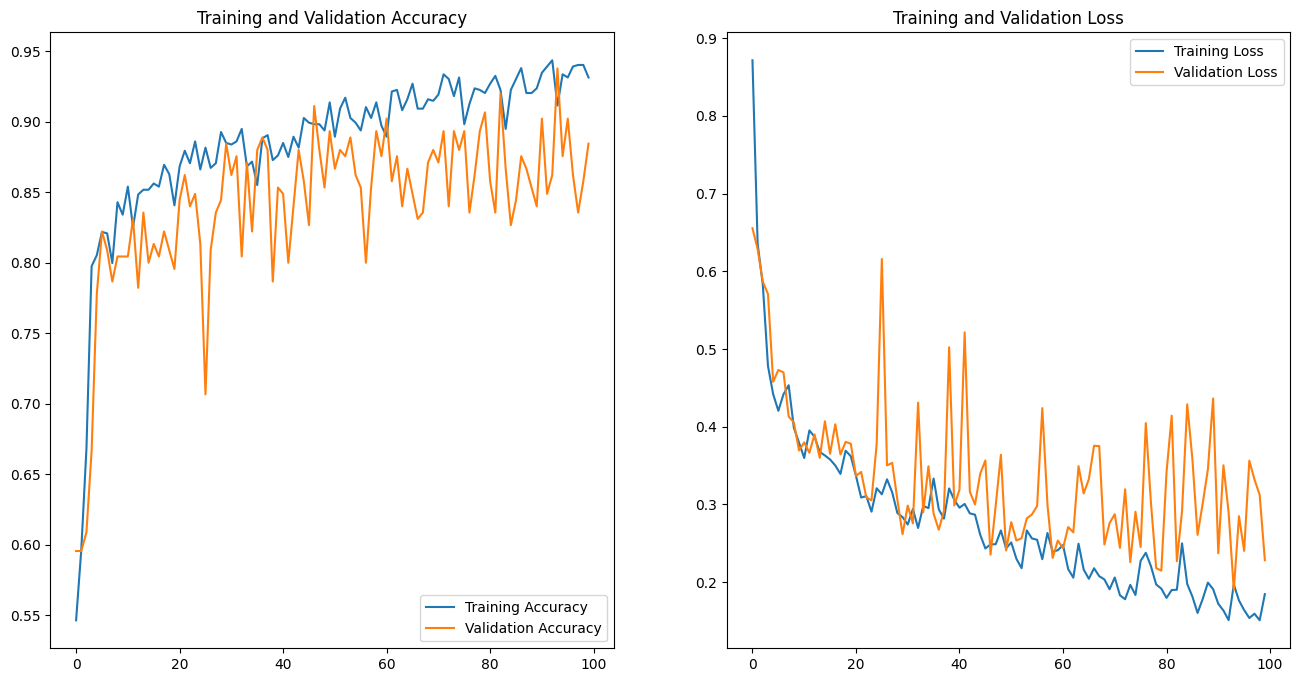

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### MobileNet

In [11]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Model Training
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### MobileNetV2

In [162]:
import tensorflow as tf

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)

base_model.trainable = False

model_v2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_v2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_22 (Dropout)        (None, 1280)              0         
                                                                 
 dense_37 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [14]:
import tensorflow as tf

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)

base_model.trainable = False

model_v2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_v2.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
model_v2.summary()

epochs = 50
history = model_v2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/50
15/

In [18]:
model.save('models/mobilenet-v2.h5')

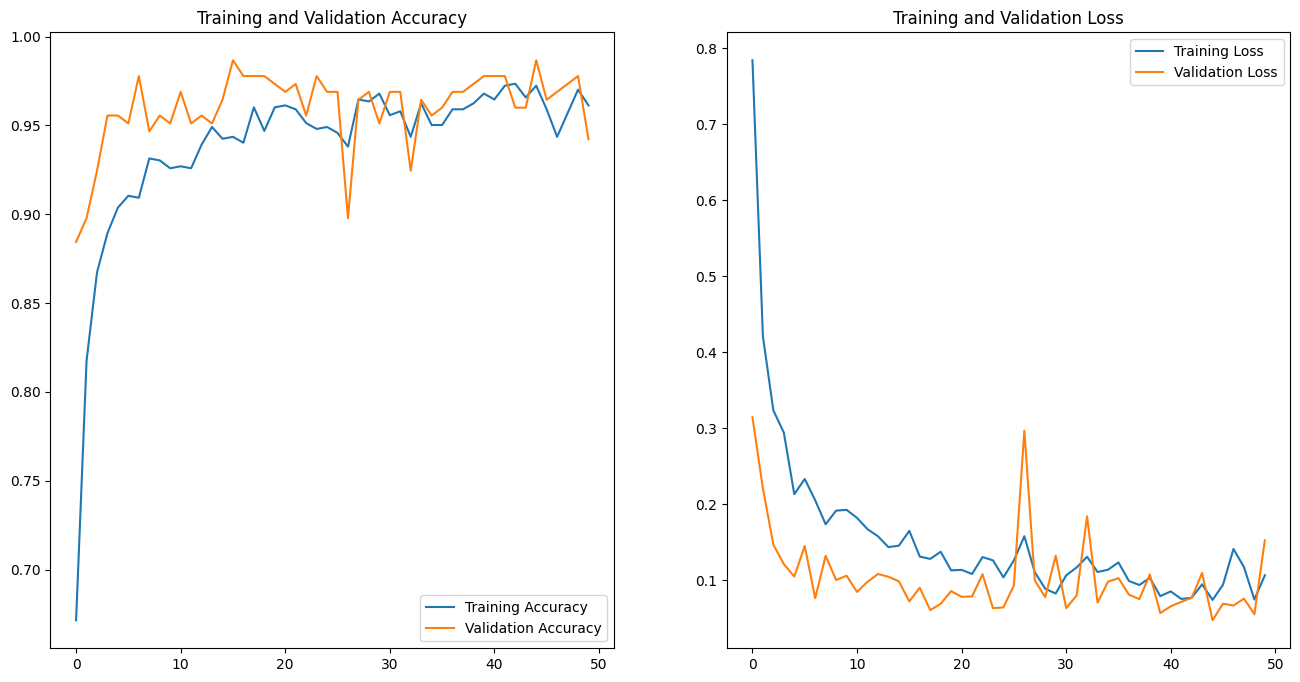

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### EfficientNetB0

In [80]:
import tensorflow as tf

model_effnet = tf.keras.applications.EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False, drop_connect_rate=0.2)

model_effnet = tf.keras.Sequential([
    model_effnet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model_effnet.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Display the model summary
model_effnet.summary()
epochs = 20
history = model_effnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_20 (Dropout)        (None, 1280)              0         
                                                                 
 dense_33 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 4052133 (15.46 MB)
Trainable params: 4010110 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/2

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_effnet.save('models/efficient-net.h5')

### Xception

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception



def create_xception_model(input_shape):
    # Define the input layer
    input_layer = layers.Input(shape=input_shape)

    # Rescaling layer to normalize pixel values

    # Load the Xception model without the top dense layers
    base_model = Xception(include_top=False, weights='imagenet', input_tensor=input_layer)

    # Global average pooling layer
    gap_layer = layers.GlobalAveragePooling2D()(base_model.output)

    # Dropout layer
    dropout_layer = layers.Dropout(0.4)(gap_layer)

    # Dense output layer for binary classification (2 classes)
    dense_layer = layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout_layer)

    # Create the final model
    model = models.Model(inputs=input_layer, outputs=dense_layer)

    model.summary()
    return model

# Instantiate and compile the model
model = create_xception_model((224, 224, 3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=1
)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_19[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

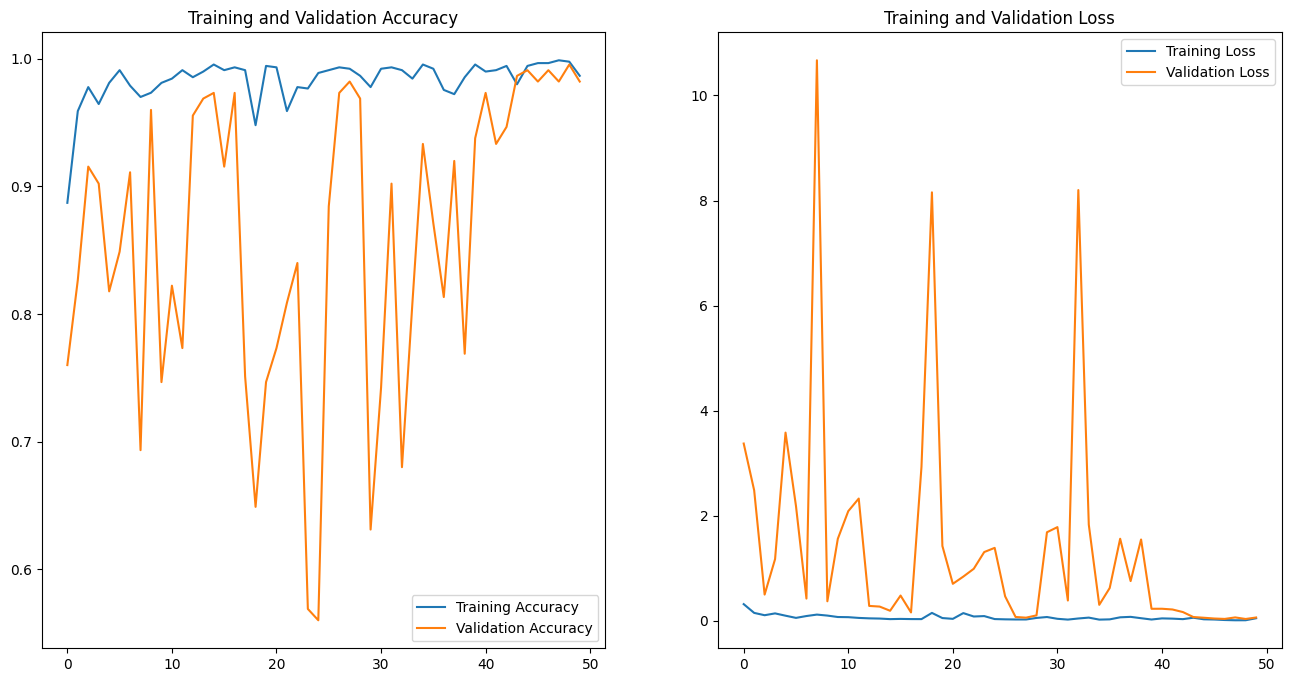

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

def create_efficientnet_model(input_shape):
    # Define the input layer
    input_layer = layers.Input(shape=input_shape)

    # Load the EfficientNet B0 model without the top dense layers
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=input_layer)

    # Global average pooling layer
    gap_layer = layers.GlobalAveragePooling2D()(base_model.output)

    # Dropout layer
    dropout_layer = layers.Dropout(0.2)(gap_layer)

    # Dense output layer for binary classification (2 classes)
    dense_layer = layers.Dense(2, activation='softmax')(dropout_layer)

    # Create the final model
    model = models.Model(inputs=input_layer, outputs=dense_layer)

    model.summary()
    return model

# Instantiate and compile the model
model = create_efficientnet_model((224, 224, 3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping],  # Early stopping callback
    verbose=1
)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_20 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_16 (Rescaling)    (None, 224, 224, 3)          0         ['input_20[0][0]']            
                                                                                                  
 normalization_8 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_16[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_17 (Rescaling)    (None, 224, 224, 3)          0         ['normalization_8[0][0]'

KeyboardInterrupt: 

### Squeeze net

In [57]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


In [58]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import the necessary libraries
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import ReLU
from sklearn.model_selection import train_test_split

datasets = tf.keras.datasets
layers =  tf.keras.layers
models = tf.keras.models
losses = tf.keras.losses
optimizers = tf.keras.optimizers
metrics = tf.keras.metrics
preprocessing_image = tf.keras.preprocessing.image
utils = tf.keras.utils
callbacks = tf.keras.callbacks

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, GlobalAveragePooling2D, Concatenate

def fire_module(x, squeeze, expand):
    sq1x1 = Conv2D(squeeze, (1, 1), activation='relu', padding='same')(x)
    ex1x1 = Conv2D(expand, (1, 1), activation='relu', padding='same')(sq1x1)
    ex3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(sq1x1)
    out = Concatenate()([ex1x1, ex3x3])
    return out

def SqueezeNet(input_shape):
    input = tf.keras.layers.Input(shape=input_shape)

    conv1 = Conv2D(64, (3,3), activation='relu', strides=(2, 2), padding='same')(input)
    pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1)

    fire2 = fire_module(pool1, 16, 64)
    pool2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire2)

    fire3 = fire_module(pool2, 16, 64)
    pool3 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire3)

    fire4 = fire_module(pool3, 32, 128)
    pool4 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire4)

    fire5 = fire_module(pool4, 32, 128)
    pool5 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire5)

    fire6 = fire_module(pool5, 48, 192)
    pool6 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire6)

    fire7 = fire_module(pool6, 48, 192)

    gap = GlobalAveragePooling2D()(fire7)

    output = Dense(1, activation='sigmoid')(gap)

    model = tf.keras.models.Model(inputs=input, outputs=output)

    return model


In [62]:
input_shape = (224, 224, 3)

# Compiling the model
sn = SqueezeNet(input_shape)

sn.summary()

sn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
           loss='binary_crossentropy',
           metrics=['accuracy'])

history = sn.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    shuffle=True)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_35 (Conv2D)          (None, 112, 112, 64)         1792      ['input_22[0][0]']            
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)           0         ['conv2d_35[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_36 (Conv2D)          (None, 56, 56, 16)           1040      ['max_pooling2d_3[0][0]'

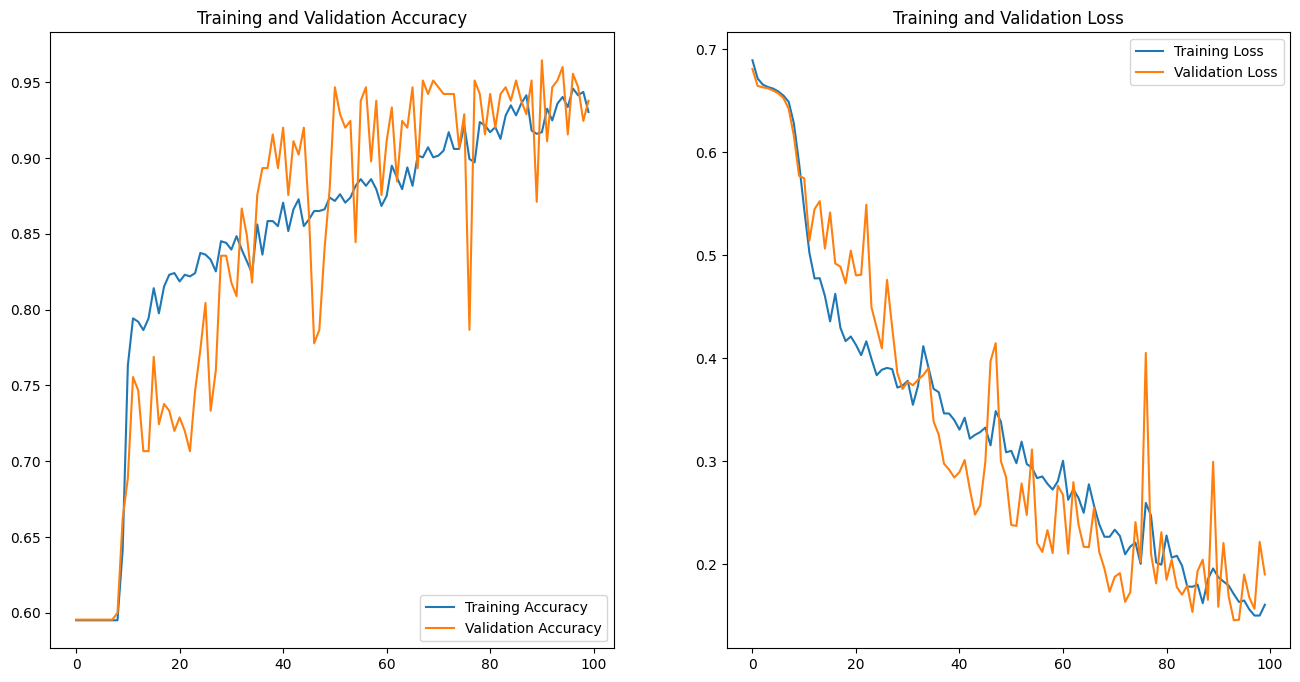

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
sn.save('models\sqznet.h5')

C:\Users\Rakhat\Documents\IoT\lux_current\venv311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### SqueezeNet softmax

In [65]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, GlobalAveragePooling2D, Concatenate

def fire_module(x, squeeze, expand):
    sq1x1 = Conv2D(squeeze, (1, 1), activation='relu', padding='same')(x)
    ex1x1 = Conv2D(expand, (1, 1), activation='relu', padding='same')(sq1x1)
    ex3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(sq1x1)
    out = Concatenate()([ex1x1, ex3x3])
    return out

def SqueezeNet(input_shape):
    input = tf.keras.layers.Input(shape=input_shape)

    conv1 = Conv2D(64, (3,3), activation='relu', strides=(2, 2), padding='same')(input)
    pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1)

    fire2 = fire_module(pool1, 16, 64)
    pool2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire2)

    fire3 = fire_module(pool2, 16, 64)
    pool3 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire3)

    fire4 = fire_module(pool3, 32, 128)
    pool4 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire4)

    fire5 = fire_module(pool4, 32, 128)
    pool5 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire5)

    fire6 = fire_module(pool5, 48, 192)
    pool6 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(fire6)

    fire7 = fire_module(pool6, 48, 192)

    gap = GlobalAveragePooling2D()(fire7)

    output = Dense(2, activation='softmax')(gap)

    model = tf.keras.models.Model(inputs=input, outputs=output)

    return model


In [66]:
input_shape = (224, 224, 3)

# Compiling the model
sn = SqueezeNet(input_shape)

sn.summary()

sn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

history = sn.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    shuffle=True)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_54 (Conv2D)          (None, 112, 112, 64)         1792      ['input_23[0][0]']            
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 64)           0         ['conv2d_54[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_55 (Conv2D)          (None, 56, 56, 16)           1040      ['max_pooling2d_9[0][0]

In [68]:
sn.save('models\sqznet_softmax.h5')

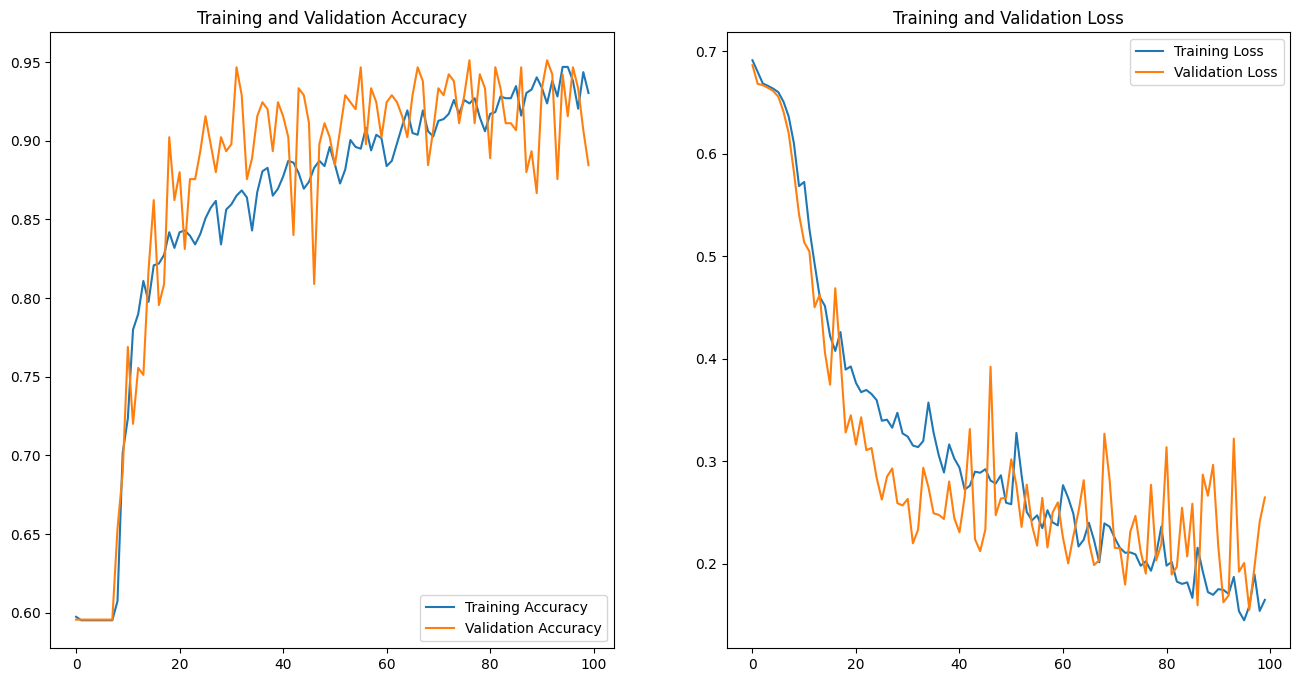

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Custom Depwise Separable CNN

In [164]:
import tensorflow as tf
from tensorflow.keras import models, layers

def create_separable_cnn(input_shape=(150, 150, 3)):
    model = models.Sequential([
        layers.SeparableConv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.SeparableConv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.SeparableConv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Global Average Pooling
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),

        # Output layer for binary or multi-class classification
        layers.Dense(2, activation='softmax') # For binary classification, or 'num_classes' for multi-class
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage
cds_cnn = create_separable_cnn()
cds_cnn.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_21 (Separ  (None, 150, 150, 32)      155       
 ableConv2D)                                                     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_22 (Separ  (None, 75, 75, 64)        2400      
 ableConv2D)                                                     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_23 (Separ  (None, 37, 37, 128)     

In [84]:
cds_cnn.compile(optimizer=tf.keras.optimizers.Adam(),
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

history = cds_cnn.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    shuffle=True)

Epoch 1/100
15/15 [==============================] - 19s 1s/step - loss: 0.6847 - accuracy: 0.5951 - val_loss: 0.6724 - val_accuracy: 0.5956
Epoch 2/100
15/15 [==============================] - 13s 842ms/step - loss: 0.6687 - accuracy: 0.5951 - val_loss: 0.6716 - val_accuracy: 0.5956
Epoch 3/100
15/15 [==============================] - 13s 852ms/step - loss: 0.6682 - accuracy: 0.5951 - val_loss: 0.6639 - val_accuracy: 0.5956
Epoch 4/100
15/15 [==============================] - 13s 862ms/step - loss: 0.6623 - accuracy: 0.5951 - val_loss: 0.6601 - val_accuracy: 0.5956
Epoch 5/100
15/15 [==============================] - 12s 836ms/step - loss: 0.6565 - accuracy: 0.5951 - val_loss: 0.6547 - val_accuracy: 0.5956
Epoch 6/100
15/15 [==============================] - 12s 834ms/step - loss: 0.6484 - accuracy: 0.5951 - val_loss: 0.6413 - val_accuracy: 0.5956
Epoch 7/100
15/15 [==============================] - 13s 887ms/step - loss: 0.6358 - accuracy: 0.5996 - val_loss: 0.6163 - val_accuracy: 0.

In [85]:
sn.save('models\cds_cnn.h5')

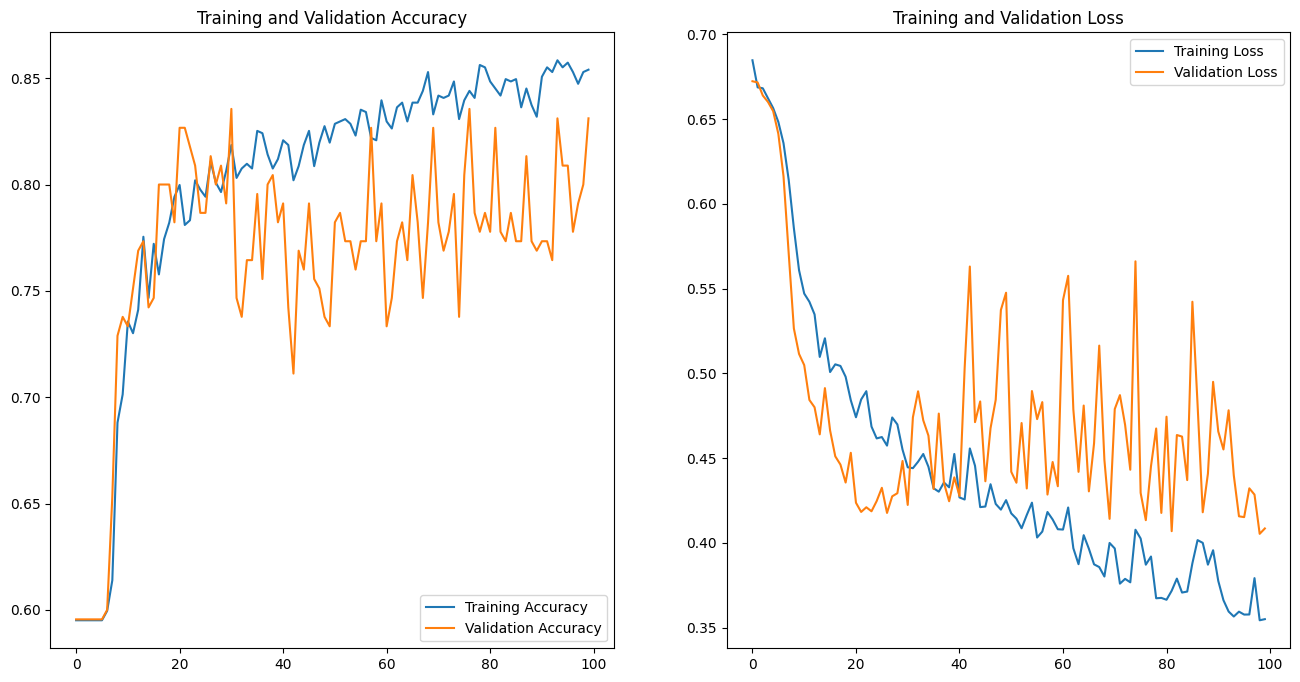

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 200 Epochs 

In [165]:
import tensorflow as tf
from tensorflow.keras import models, layers

def create_separable_cnn(input_shape=(150, 150, 3)):
    model = models.Sequential([
        layers.SeparableConv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.SeparableConv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.SeparableConv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Global Average Pooling
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),

        # Output layer for binary or multi-class classification
        layers.Dense(2, activation='softmax') # For binary classification, or 'num_classes' for multi-class
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage
cds_cnn = create_separable_cnn()
cds_cnn.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_24 (Separ  (None, 150, 150, 32)      155       
 ableConv2D)                                                     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_25 (Separ  (None, 75, 75, 64)        2400      
 ableConv2D)                                                     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_26 (Separ  (None, 37, 37, 128)     

In [166]:
cds_cnn.compile(optimizer=tf.keras.optimizers.Adam(),
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

history = cds_cnn.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    shuffle=True)

Epoch 1/200
15/15 [==============================] - 26s 1s/step - loss: 0.6876 - accuracy: 0.5885 - val_loss: 0.6805 - val_accuracy: 0.5956
Epoch 2/200
15/15 [==============================] - 14s 944ms/step - loss: 0.6732 - accuracy: 0.5951 - val_loss: 0.6709 - val_accuracy: 0.5956
Epoch 3/200
15/15 [==============================] - 13s 875ms/step - loss: 0.6664 - accuracy: 0.5951 - val_loss: 0.6669 - val_accuracy: 0.5956
Epoch 4/200
15/15 [==============================] - 13s 849ms/step - loss: 0.6644 - accuracy: 0.5951 - val_loss: 0.6652 - val_accuracy: 0.5956
Epoch 5/200
15/15 [==============================] - 13s 859ms/step - loss: 0.6589 - accuracy: 0.5951 - val_loss: 0.6564 - val_accuracy: 0.5956
Epoch 6/200
15/15 [==============================] - 13s 870ms/step - loss: 0.6497 - accuracy: 0.5951 - val_loss: 0.6446 - val_accuracy: 0.5956
Epoch 7/200
15/15 [==============================] - 13s 866ms/step - loss: 0.6328 - accuracy: 0.6007 - val_loss: 0.6176 - val_accuracy: 0.

In [167]:
cds_cnn.save('models\cds_cnn_200_epochs.h5')

C:\Users\Rakhat\Documents\IoT\lux_current\venv311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


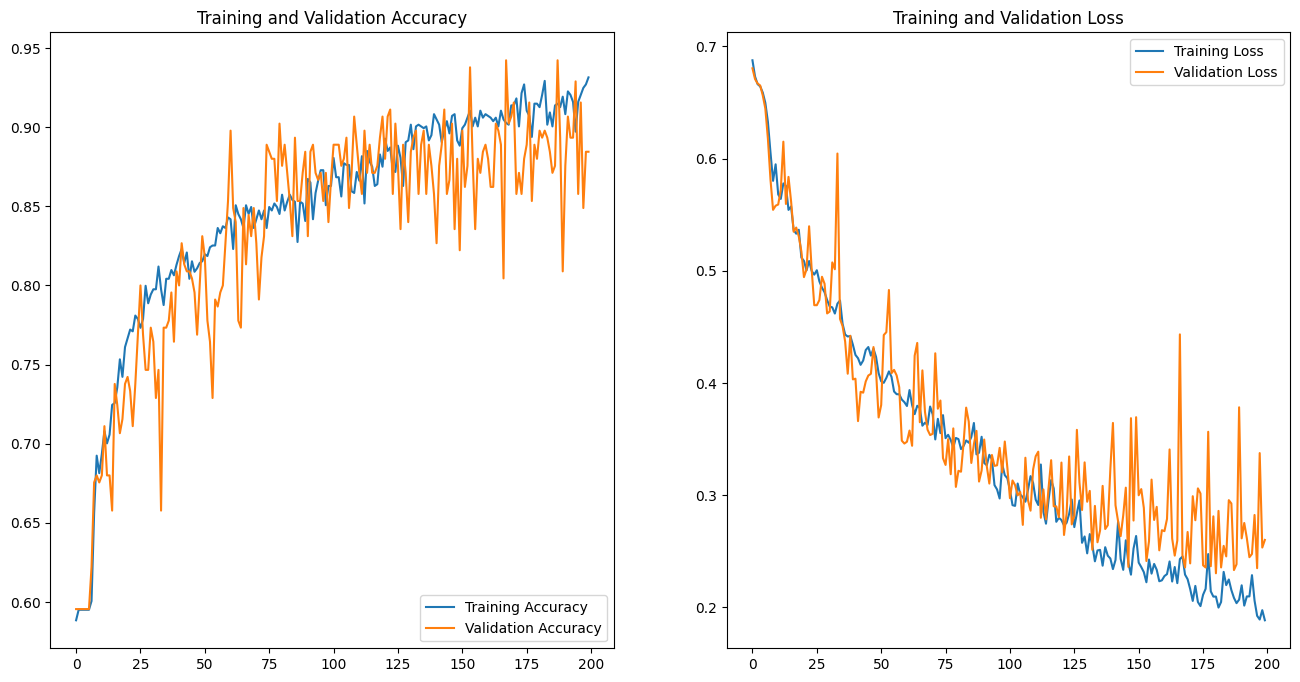

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation

In [89]:
import os
os.listdir("models")

['2-layer.h5',
 'cds_cnn.h5',
 'mobilenet-v2.h5',
 'mobilnet.h5',
 'sqznet.h5',
 'sqznet_softmax.h5']

In [147]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

model_names = os.listdir("models")
models = {name: tf.keras.models.load_model('models\\' + name) for name in model_names}


In [156]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    validation_generator = train_datagen.flow_from_directory(
        '.\\dataset\\bmsb_dataset',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    y_pred_probs = model.predict(validation_generator)

    if name == "sqznet.h5":
        y_pred = (y_pred > 0.5).astype('int32')
    else:
        y_pred = np.argmax(y_pred_probs, axis=1)

    y_true = validation_generator.classes

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Append results to list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Output results as a DataFrame for better visualization
# import pandas as pd
# df_results = pd.DataFrame(results)
# print(df_results)


Found 225 images belonging to 2 classes.
4/4 [==============================] - 3s 599ms/step
Found 225 images belonging to 2 classes.
4/4 [==============================] - 3s 609ms/step
Found 225 images belonging to 2 classes.
4/4 [==============================] - 3s 667ms/step
Found 225 images belonging to 2 classes.
4/4 [==============================] - 3s 702ms/step
Found 225 images belonging to 2 classes.
4/4 [==============================] - 3s 590ms/step
Found 225 images belonging to 2 classes.
4/4 [==============================] - 3s 629ms/step


In [157]:
df_results = pd.DataFrame(results)
print(df_results)


               Model  Accuracy  Precision    Recall  F1 Score
0         2-layer.h5  0.897778   0.872483  0.970149  0.918728
1         cds_cnn.h5  0.884444   0.846154  0.985075  0.910345
2    mobilenet-v2.h5  0.955556   0.955882  0.970149  0.962963
3        mobilnet.h5  0.960000   0.956204  0.977612  0.966790
4          sqznet.h5  0.960000   0.956204  0.977612  0.966790
5  sqznet_softmax.h5  0.893333   0.852564  0.992537  0.917241


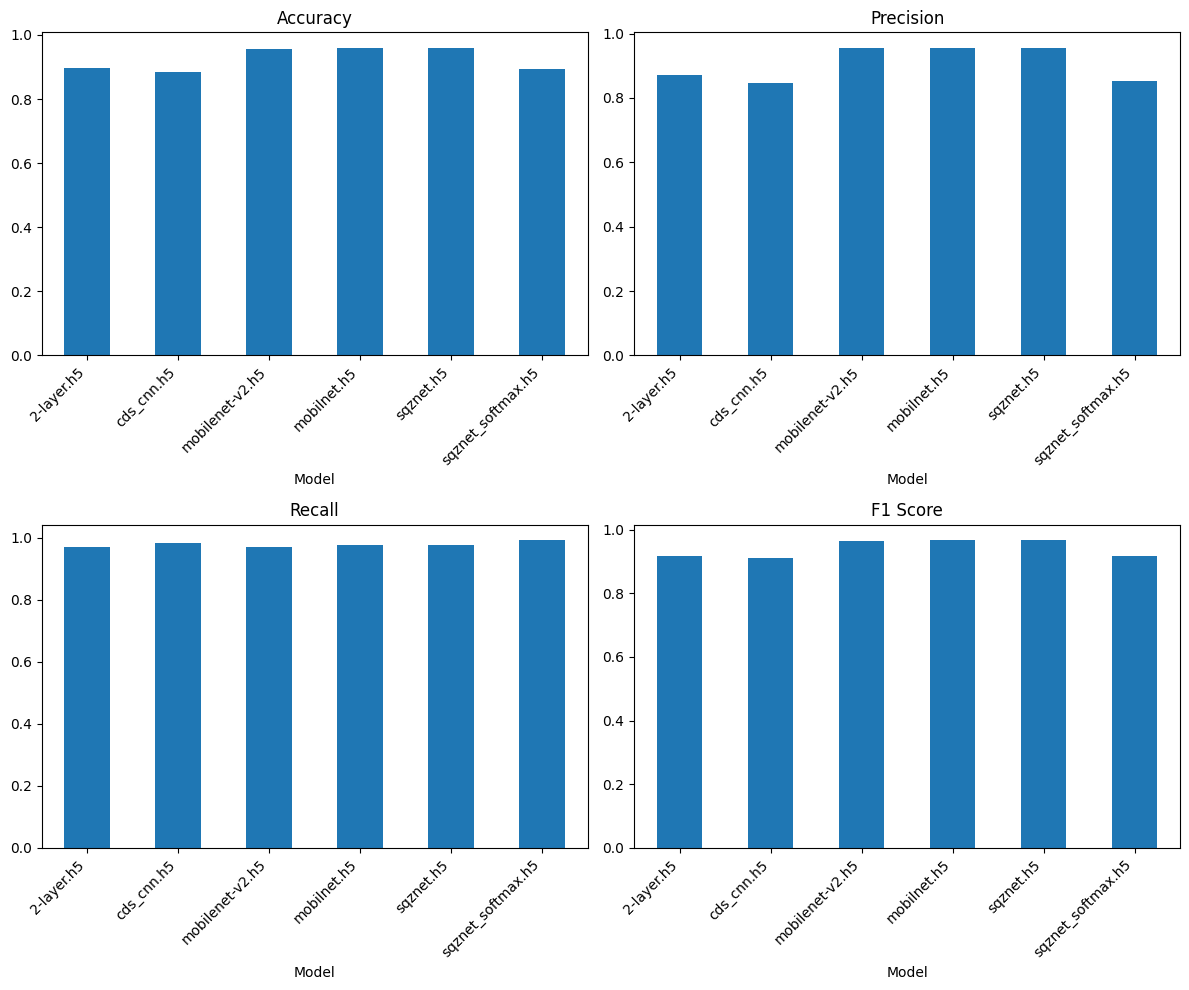

In [158]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for axi, metric in zip(ax.flat, metrics):
    df_results.plot(x='Model', y=metric, kind='bar', ax=axi, legend=None)
    axi.set_title(metric)
    axi.set_xticklabels(df_results['Model'], rotation=45, ha='right')

fig.tight_layout()
plt.show()


Models to try:
MobileNet
MobileNet2
ResNet
SqueezeNet
